In [1]:
%matplotlib notebook
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
import gym
import numpy as np
from hydra.core.hydra_config import HydraConfig
from mbrl.third_party.pytorch_sac_pranz24.sac_reg_norm import SAC_REG
from mbrl.util.logger import Logger
from mbrl.util.replay_buffer import ReplayBuffer
import mbrl.constants
import matplotlib.pyplot as plt
initialize(version_base=None, config_path="./config")

hydra.initialize()

In [2]:
cfg=compose(config_name="config.yaml")

In [3]:
env = gym.make('gym_custom:' + cfg.sim_config.name, cfg = cfg.sim_config)

/home/dsubhasish/miniconda3/envs/mfrl_zf/lib/python3.10/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
states = []
rewards = []
u = np.zeros((2,1))
u[1,0] = -1
state = env.reset()
done =  False
for i in range(10000):
    state, reward, done, info = env.step(u)
    states.append(state)
    rewards.append(reward)
    if done: 
        break
states = np.array(states)
rewards = np.array(rewards)

<IPython.core.display.Javascript object>


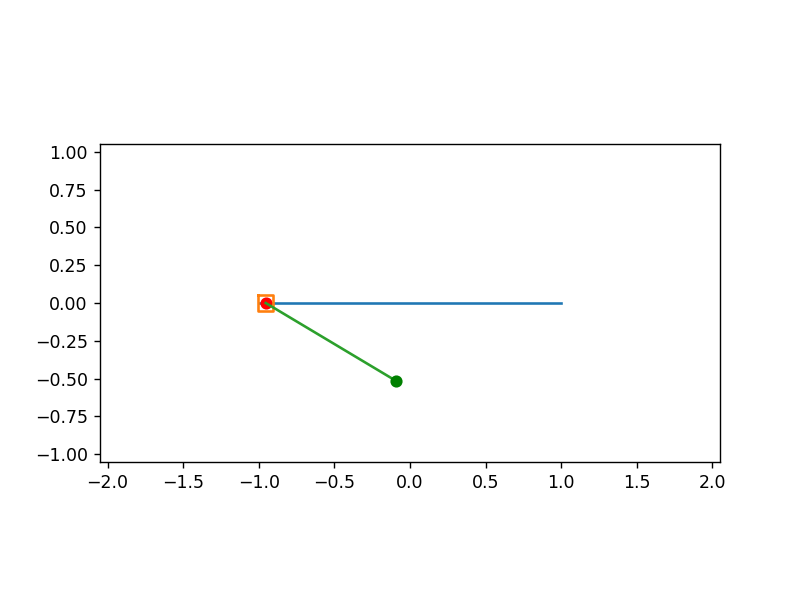

In [5]:
env.animate(states)
    

In [6]:
states.shape

(1496, 6)

<IPython.core.display.Javascript object>


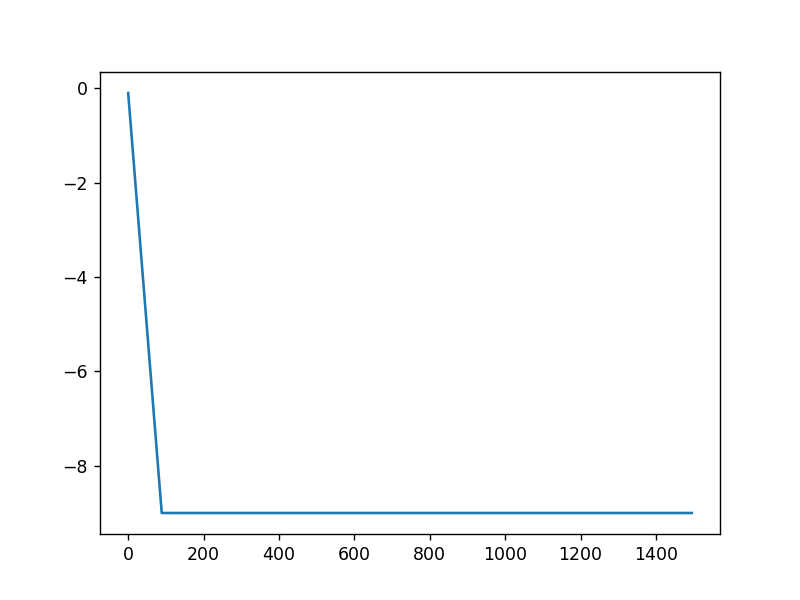

In [7]:
plt.figure(200)
plt.plot(states[:,5])